# 1. Предварительная обработка данных

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Загрузка данных
file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Обработка отсутствующих значений: заменим нули на медианные значения для определённых признаков
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_with_zeros:
    diabetes_data[column] = diabetes_data[column].replace(0, diabetes_data[column].median())

# Масштабирование данных
scaler = StandardScaler()

# Масштабируем признаки (без целевой переменной 'Outcome')
scaled_features = diabetes_data.drop(columns=['Outcome'])
scaled_features = pd.DataFrame(scaler.fit_transform(scaled_features), columns=scaled_features.columns)

# Добавляем обратно колонку 'Outcome'
scaled_data = scaled_features.copy()
scaled_data['Outcome'] = diabetes_data['Outcome']

# Выводим первые строки данных после обработки
scaled_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1


# 2. Статистика и визуализация

In [12]:
# Описательная статистика по данным
statistics = scaled_data.describe()
statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,4.625929e-18,5.782412e-18,-1.272131e-16,2.602085e-17,4.672189e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.204774e+00,-7.646304e-01,-2.074100e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.699809e-01,-6.082010e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-4.699809e-01,-6.010905e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.112653e-01,6.297816e-01,5.058400e-01,3.090444e-01,6.038649e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.542658e+00,4.104082e+00,7.770285e+00,7.123206e+00,5.042883e+00,5.883565e+00,4.063716e+00,1.000000


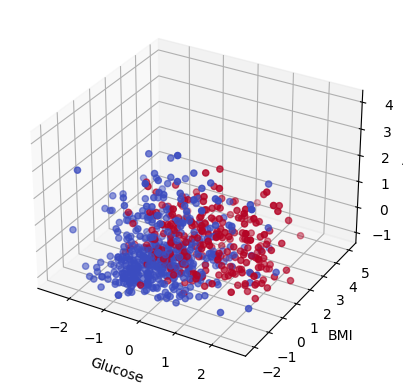

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D-визуализация: Glucose, BMI и Age
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_data['Glucose'], scaled_data['BMI'], scaled_data['Age'], c=scaled_data['Outcome'], cmap='coolwarm')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()

# 3. Реализация метода k-ближайших соседей

In [14]:
import numpy as np

# Функция для расчета евклидова расстояния
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Реализация k-NN
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# 4. Построение двух моделей k-NN

In [15]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = scaled_data.drop(columns=['Outcome'])
y = scaled_data['Outcome']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель 1: случайные признаки
np.random.seed(42)
random_features = np.random.choice(X_train.columns, size=4, replace=False)
X_train_random = X_train[random_features]
X_test_random = X_test[random_features]

# Модель 2: фиксированные признаки
fixed_features = ['Glucose', 'BMI', 'Age', 'Insulin']
X_train_fixed = X_train[fixed_features]
X_test_fixed = X_test[fixed_features]

# Обучение моделей
knn_random = KNN(k=5)
knn_random.fit(X_train_random.to_numpy(), y_train.to_numpy())

knn_fixed = KNN(k=5)
knn_fixed.fit(X_train_fixed.to_numpy(), y_train.to_numpy())

# 5. Оценка моделей на разных значениях k

In [16]:
from sklearn.metrics import confusion_matrix

# Оценка для модели 1 (случайные признаки)
print("Модель 1: случайные признаки")
for k in [3, 5, 10]:
    knn = KNN(k=k)
    knn.fit(X_train_random.to_numpy(), y_train.to_numpy())
    y_pred = knn.predict(X_test_random.to_numpy())
    cm = confusion_matrix(y_test, y_pred)
    print(f'Матрица ошибок для k={k}:')
    print(cm)

# Оценка для модели 2 (фиксированные признаки)
print("\nМодель 2: фиксированные признаки")
for k in [3, 5, 10]:
    knn = KNN(k=k)
    knn.fit(X_train_fixed.to_numpy(), y_train.to_numpy())
    y_pred = knn.predict(X_test_fixed.to_numpy())
    cm = confusion_matrix(y_test, y_pred)
    print(f'Матрица ошибок для k={k}:')
    print(cm)


Модель 1: случайные признаки
Матрица ошибок для k=3:
[[79 20]
 [19 36]]
Матрица ошибок для k=5:
[[79 20]
 [15 40]]
Матрица ошибок для k=10:
[[87 12]
 [20 35]]

Модель 2: фиксированные признаки
Матрица ошибок для k=3:
[[70 29]
 [22 33]]
Матрица ошибок для k=5:
[[70 29]
 [17 38]]
Матрица ошибок для k=10:
[[79 20]
 [23 32]]
